In [ ]:
!nvidia-smi

Tue Jul 27 14:16:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install matplotlib==3.3.3

In [ ]:
import sys
import os
from copy import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

import cv2
import time
import itertools
import random

from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix

mlt.__version__

'3.3.3'

In [ ]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [ ]:
import tensorflow.keras as keras

from tensorflow.keras import layers, models, optimizers, losses

from tensorflow.keras.models import Sequential, Model, load_model

from tensorflow.keras.layers import (Flatten, Dense, Conv2D, MaxPooling2D, 
                                    Concatenate, Dot, Lambda, Dropout, ZeroPadding2D, Activation, concatenate, 
                                    BatchNormalization, Conv1D, GlobalAveragePooling2D, InputLayer, Input)

from tensorflow.keras.optimizers import Adam, RMSprop, SGD

from tensorflow.keras.losses import binary_crossentropy, sparse_categorical_crossentropy, categorical_crossentropy


from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger, TensorBoard

from tensorflow.keras import backend as K

import tensorflow.keras.utils as utils

from tensorflow.keras.applications import DenseNet201

from tensorflow.keras.datasets import mnist, fashion_mnist

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [ ]:
K.clear_session()

# Visualize_Filters_and_Feature_Maps_in_Convolutional_Neural_Networks

# part one - filters

In [ ]:
# load vgg model
from tensorflow.keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# summarize the model
model.summary()

553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

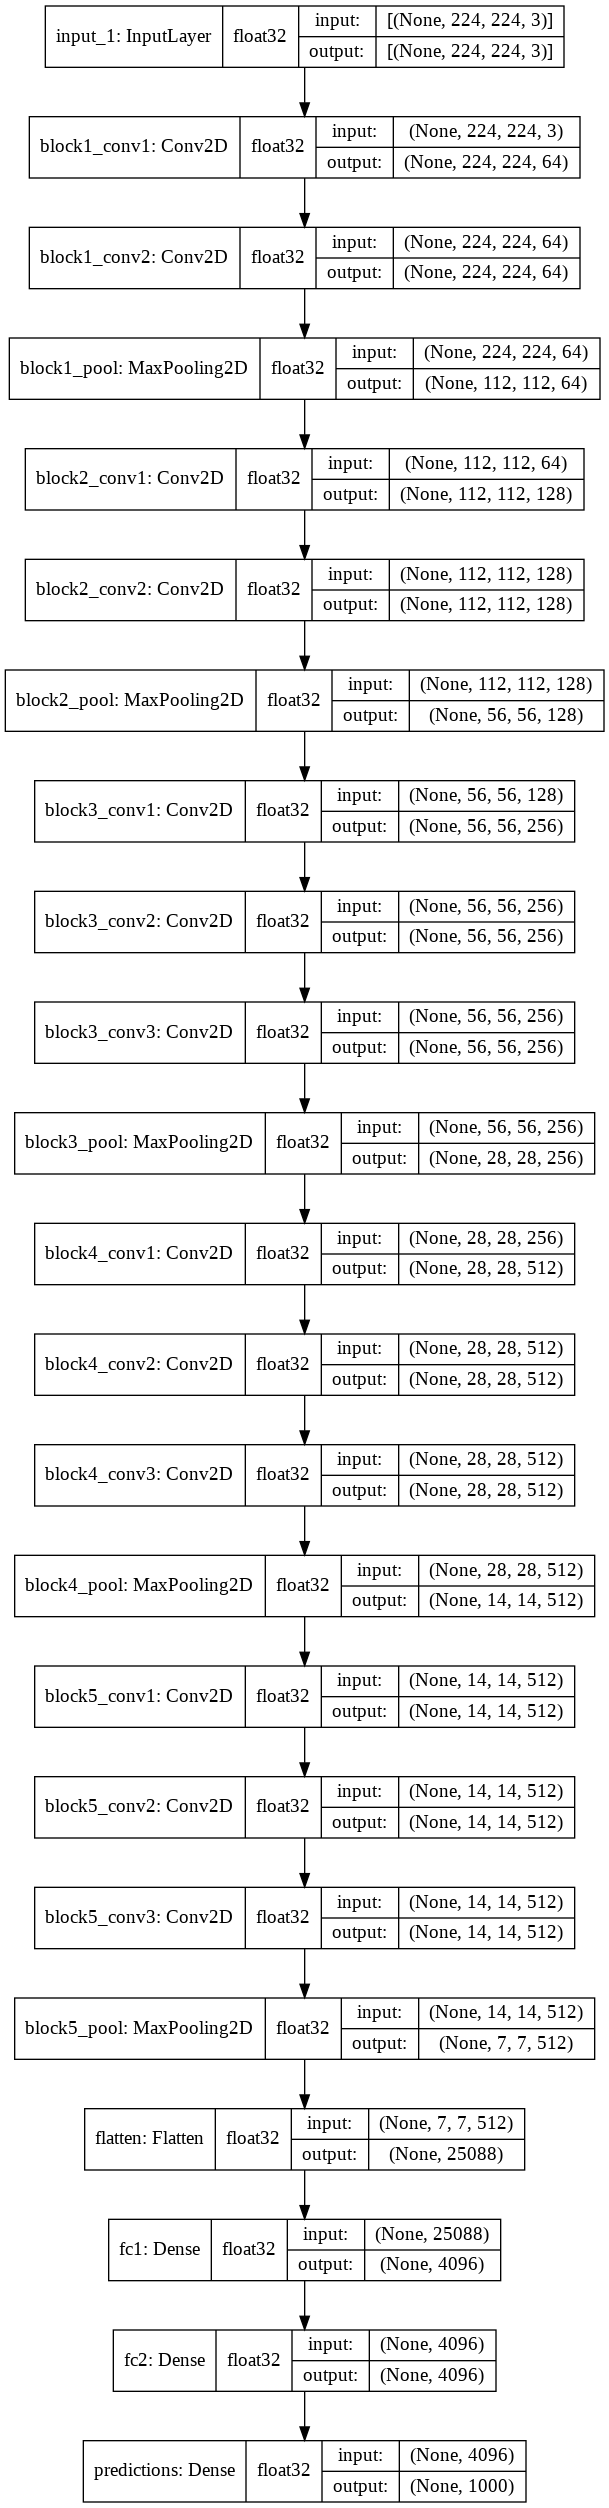

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, show_dtype=True)

In [ ]:
model.layers

In [ ]:
model.inputs

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>]

In [ ]:
model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
model.outputs

[<KerasTensor: shape=(None, 1000) dtype=float32 (created by layer 'predictions')>]

In [ ]:
model.layers[0].input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
model.layers[1].input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
model.layers[1].output

<KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>

In [ ]:
model.layers[0].name

'input_1'

In [ ]:
model.layers[1].name

'block1_conv1'

In [ ]:
# summarize filters in each convolutional layer
# from tensorflow.keras.applications.vgg16 import VGG16
from matplotlib import pyplot


# # load the model
# model = VGG16()


# summarize filter shapes
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [ ]:
filters.shape , filters.dtype

((3, 3, 3, 64), dtype('float32'))

In [ ]:
filters[:, :, :, 0].shape

(3, 3, 3)

(3, 3, 3, 64)
filter index : 0 - shape : (3, 3, 3)


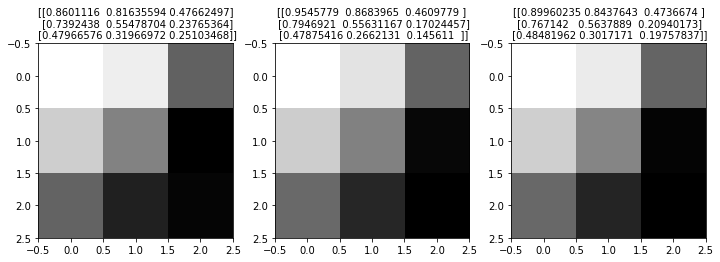


filter index : 1 - shape : (3, 3, 3)


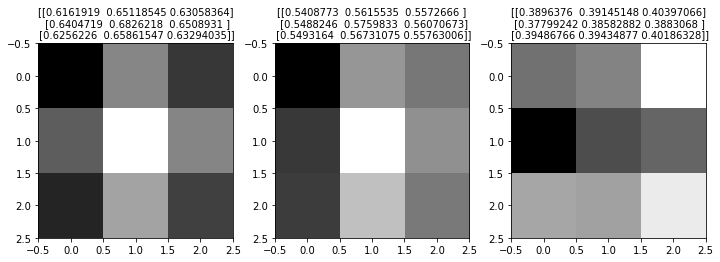


filter index : 2 - shape : (3, 3, 3)


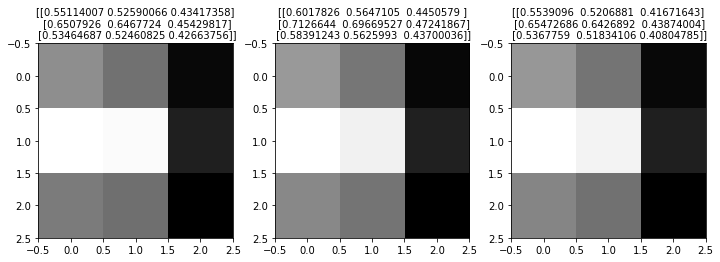


filter index : 3 - shape : (3, 3, 3)


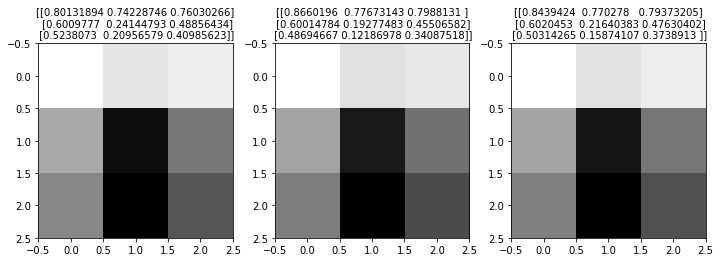


filter index : 4 - shape : (3, 3, 3)


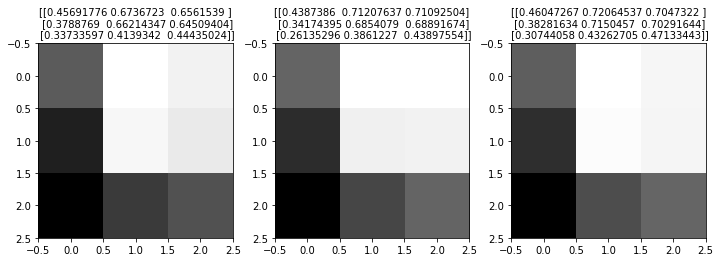


filter index : 5 - shape : (3, 3, 3)


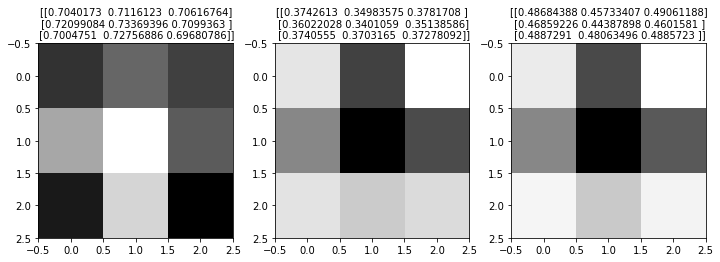

In [ ]:
# cannot easily visualize filters lower down
# from tensorflow.keras.applications.vgg16 import VGG16
from matplotlib import pyplot


# load the model
# model = VGG16()


# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
print(filters.shape)

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)


# plot first few filters
n_filters, ix = 6, 1

for i in range(n_filters):
  # get the filter
  f = filters[:, :, :, i]
  print("filter index :",i,"- shape :",f.shape)

  ix=1
  pyplot.figure(figsize=(10,5))
  # plot each channel separately
  for j in range(3):
    # specify subplot and turn of axis
    pyplot.subplot(1,3,ix)
    # ax = pyplot.subplot(n_filters, 3, ix)
    # ax.set_xticks([])
    # ax.set_yticks([])
    # plot filter channel in grayscale
    pyplot.title(f"{f[:, :, j]}",fontsize=10)
    pyplot.imshow(f[:, :, j], cmap='gray')
    # pyplot.axis('off')
    # pyplot.subplots_adjust(right=0.8)
    # pyplot.margins(0.8)

    ix += 1

  # show the figure
  pyplot.tight_layout()
  pyplot.show()
  print()


(3, 3, 3, 64)
filter index : 0 - shape : (3, 3, 3)


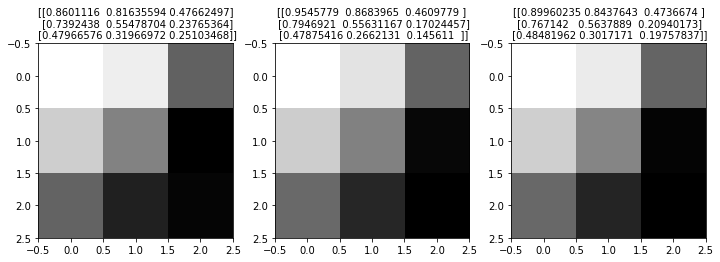


filter index : 1 - shape : (3, 3, 3)


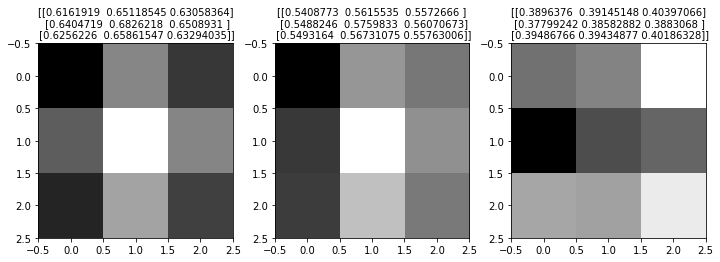


filter index : 2 - shape : (3, 3, 3)


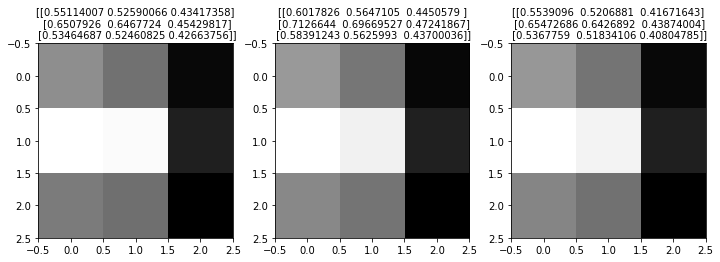


filter index : 3 - shape : (3, 3, 3)


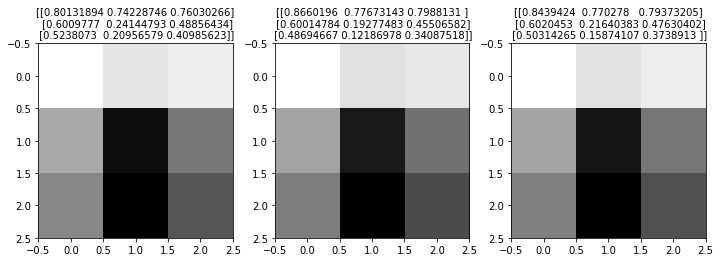


filter index : 4 - shape : (3, 3, 3)


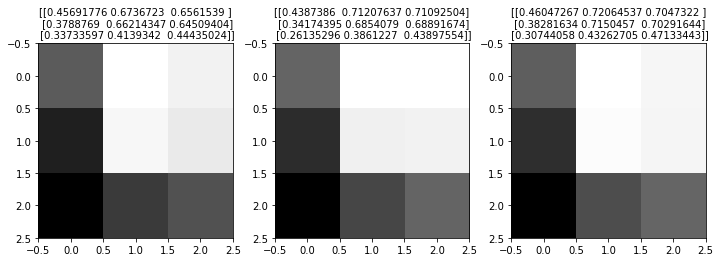


filter index : 5 - shape : (3, 3, 3)


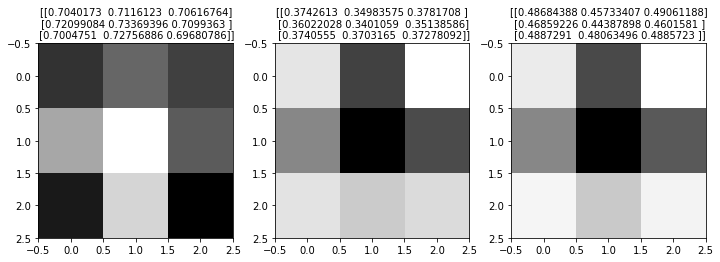


filter index : 6 - shape : (3, 3, 3)


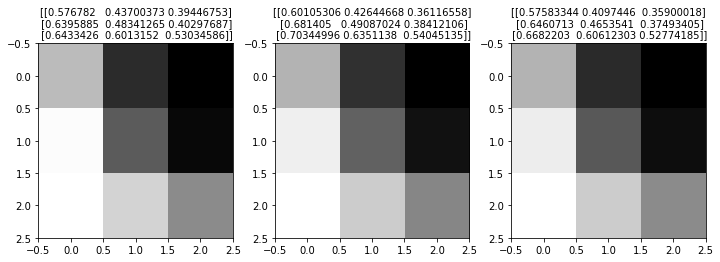


filter index : 7 - shape : (3, 3, 3)


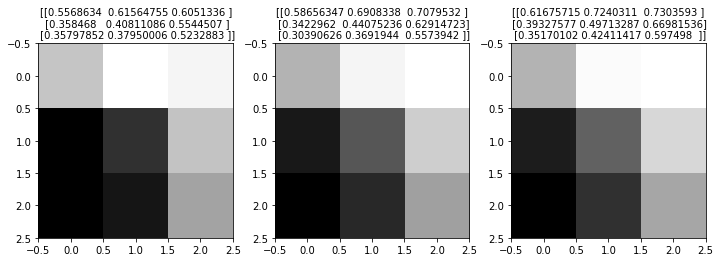


filter index : 8 - shape : (3, 3, 3)


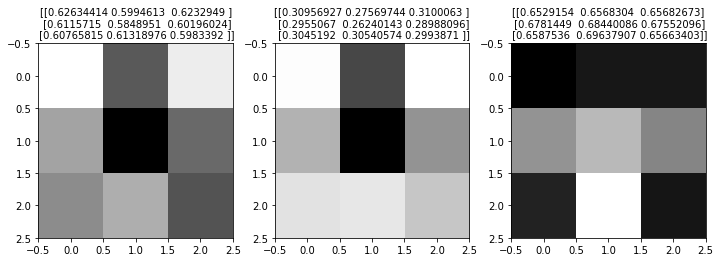


filter index : 9 - shape : (3, 3, 3)


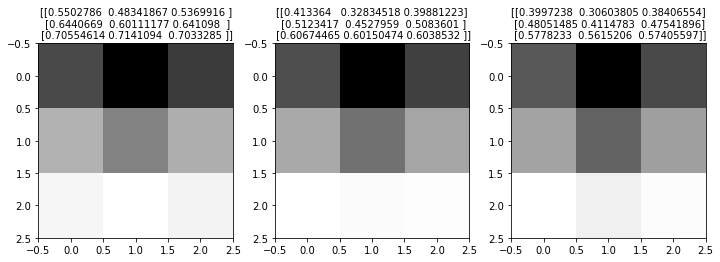


filter index : 10 - shape : (3, 3, 3)


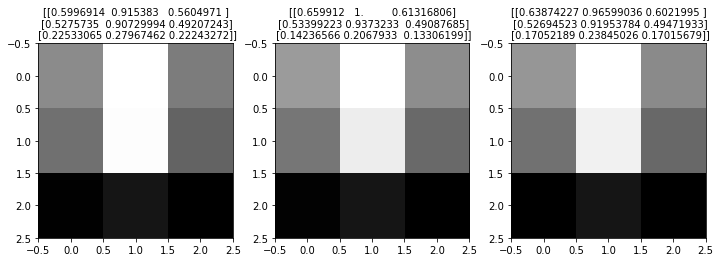


filter index : 11 - shape : (3, 3, 3)


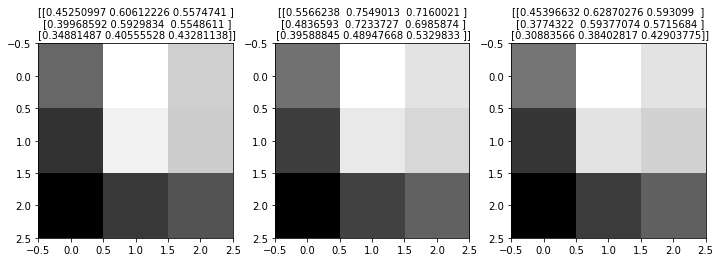


filter index : 12 - shape : (3, 3, 3)


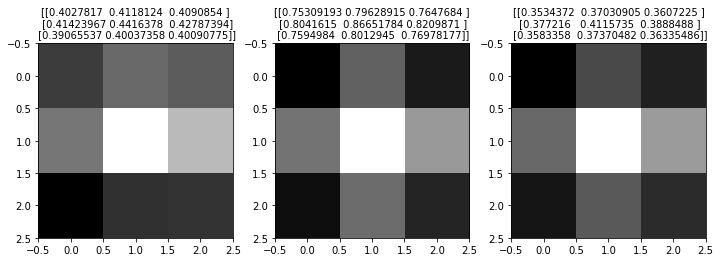


filter index : 13 - shape : (3, 3, 3)


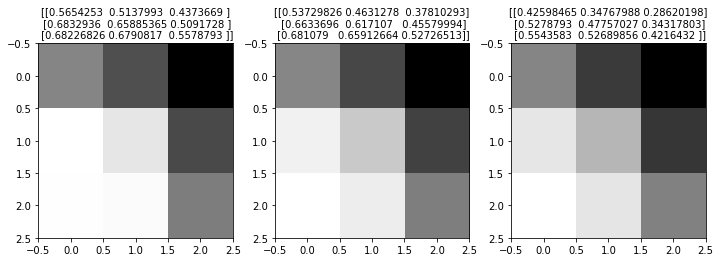


filter index : 14 - shape : (3, 3, 3)


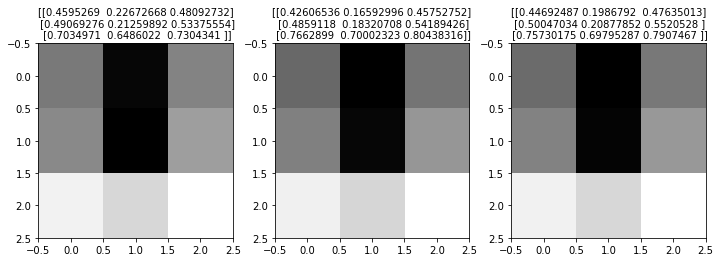


filter index : 15 - shape : (3, 3, 3)


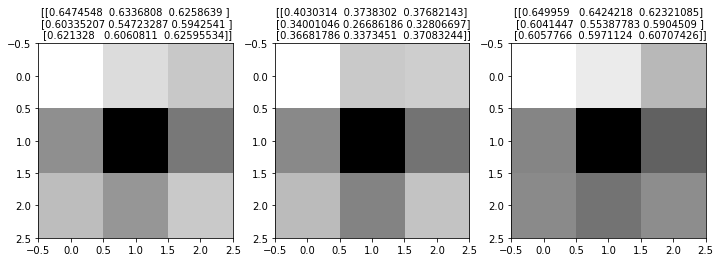


filter index : 16 - shape : (3, 3, 3)


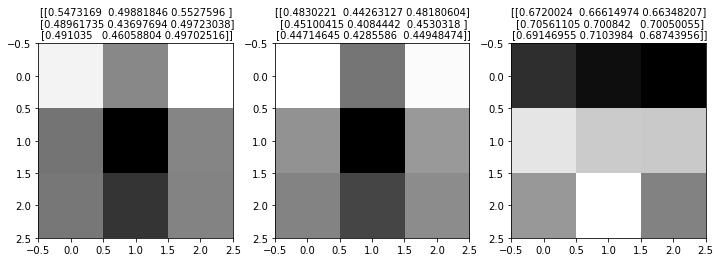


filter index : 17 - shape : (3, 3, 3)


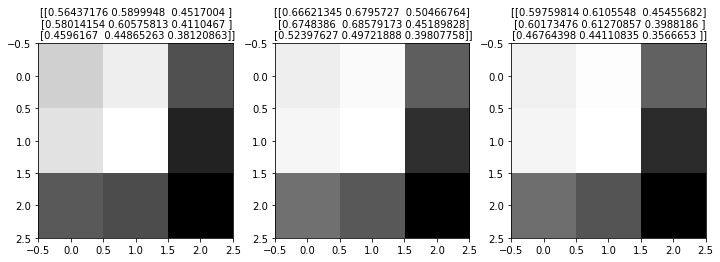


filter index : 18 - shape : (3, 3, 3)


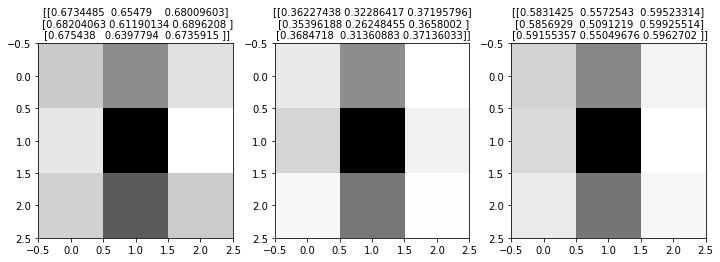


filter index : 19 - shape : (3, 3, 3)


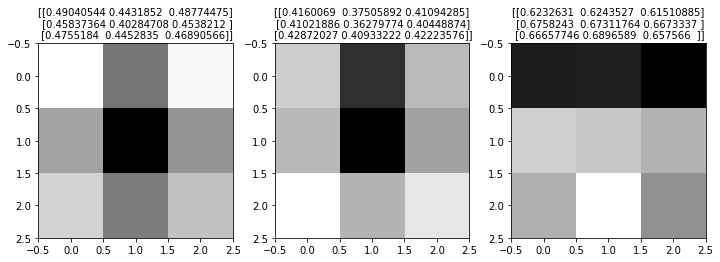


filter index : 20 - shape : (3, 3, 3)


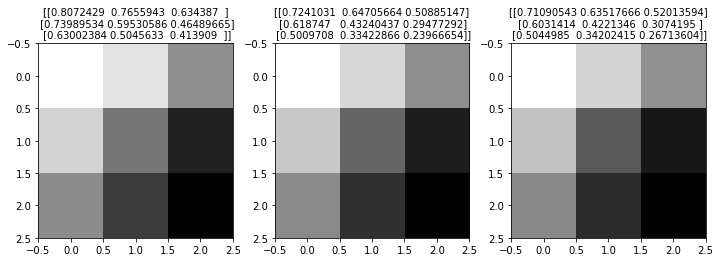


filter index : 21 - shape : (3, 3, 3)


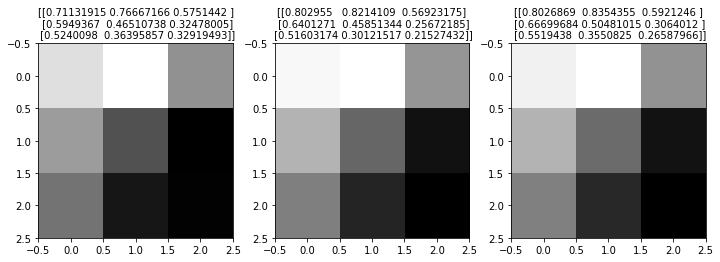


filter index : 22 - shape : (3, 3, 3)


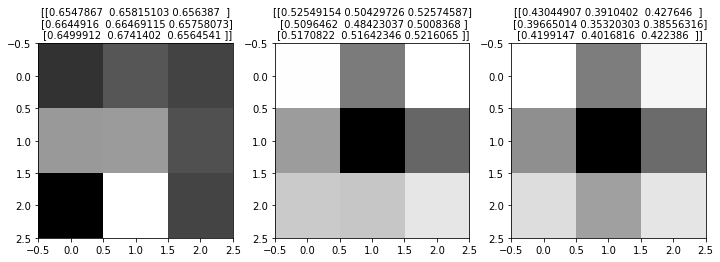


filter index : 23 - shape : (3, 3, 3)


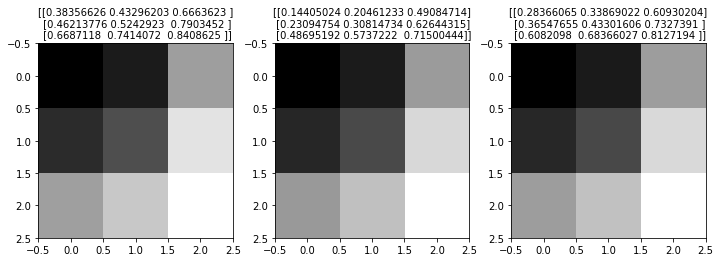


filter index : 24 - shape : (3, 3, 3)


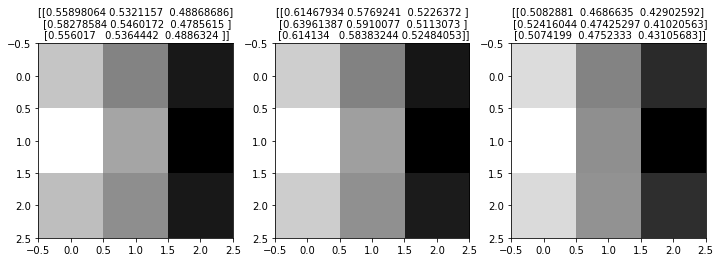


filter index : 25 - shape : (3, 3, 3)


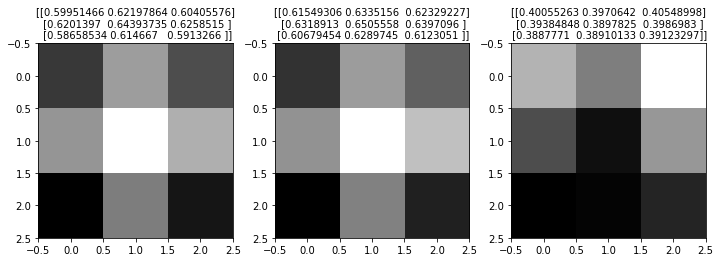


filter index : 26 - shape : (3, 3, 3)


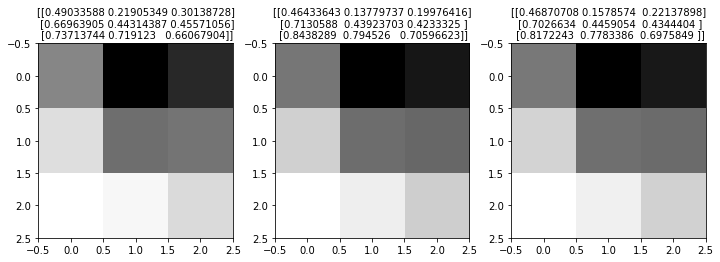


filter index : 27 - shape : (3, 3, 3)


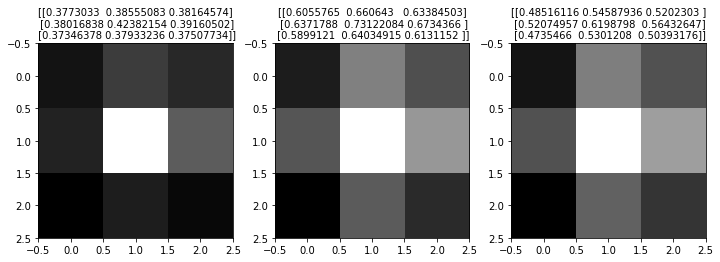


filter index : 28 - shape : (3, 3, 3)


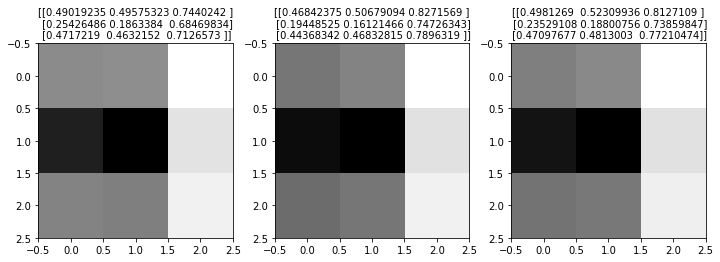


filter index : 29 - shape : (3, 3, 3)


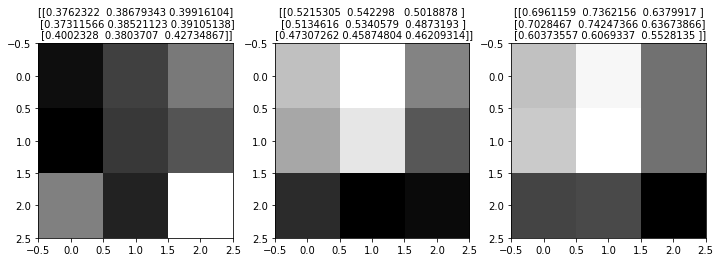


filter index : 30 - shape : (3, 3, 3)


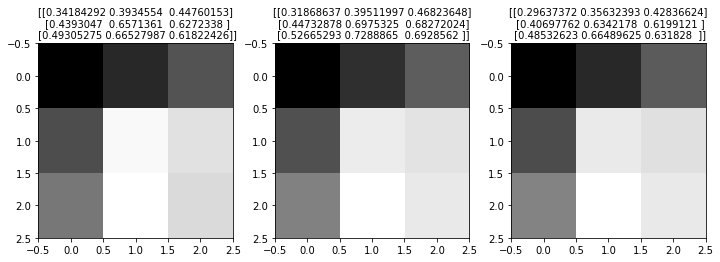


filter index : 31 - shape : (3, 3, 3)


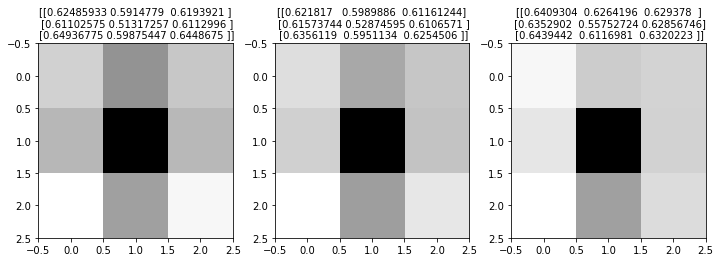


filter index : 32 - shape : (3, 3, 3)


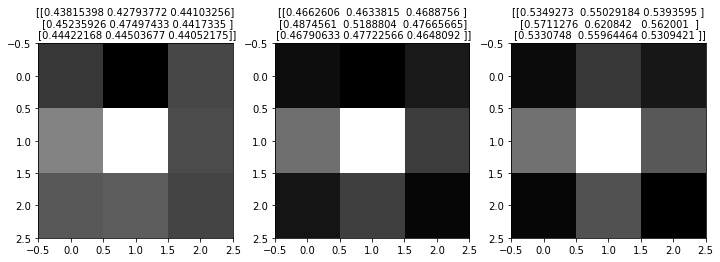


filter index : 33 - shape : (3, 3, 3)


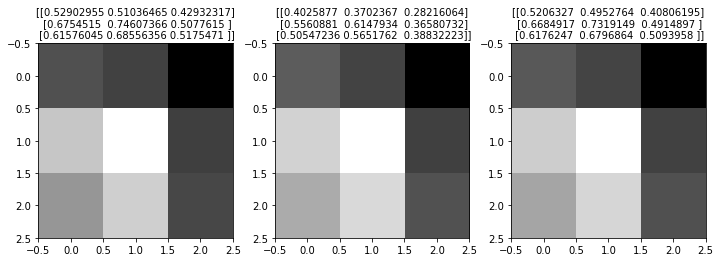


filter index : 34 - shape : (3, 3, 3)


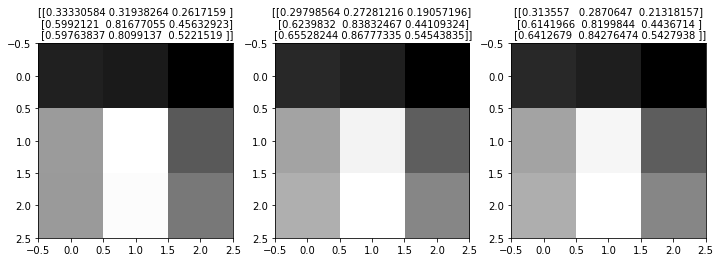


filter index : 35 - shape : (3, 3, 3)


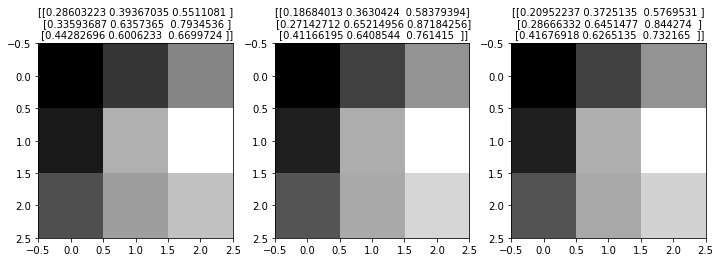


filter index : 36 - shape : (3, 3, 3)


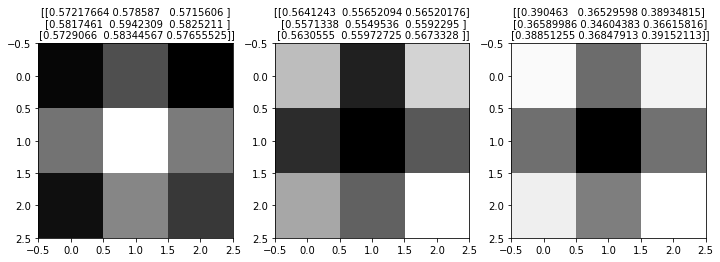


filter index : 37 - shape : (3, 3, 3)


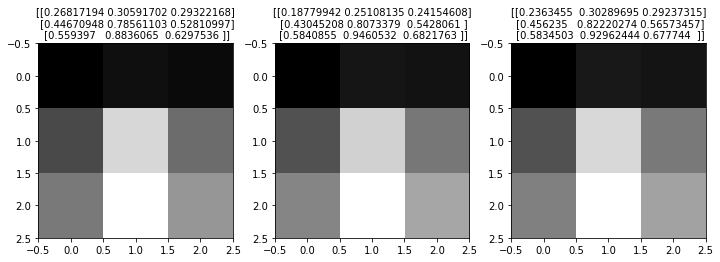


filter index : 38 - shape : (3, 3, 3)


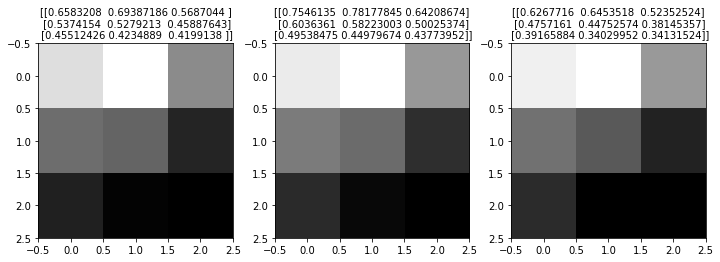


filter index : 39 - shape : (3, 3, 3)


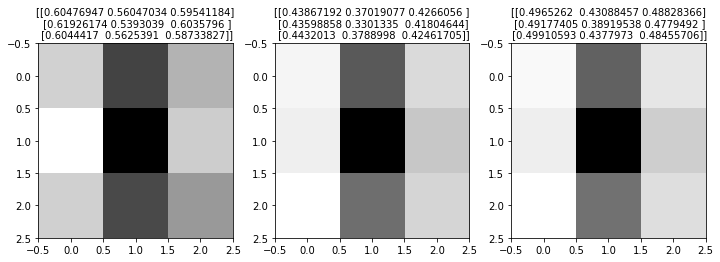


filter index : 40 - shape : (3, 3, 3)


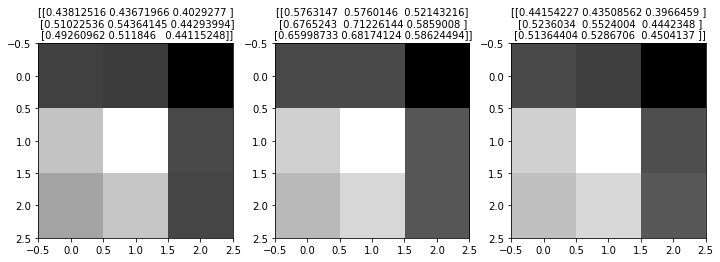


filter index : 41 - shape : (3, 3, 3)


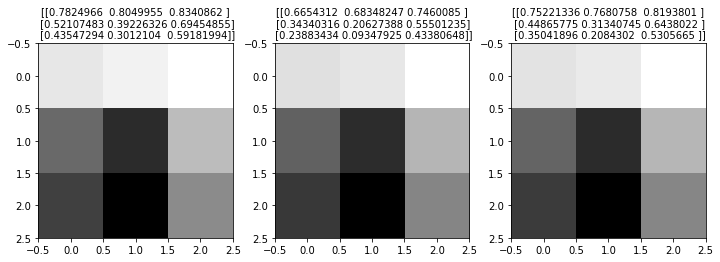


filter index : 42 - shape : (3, 3, 3)


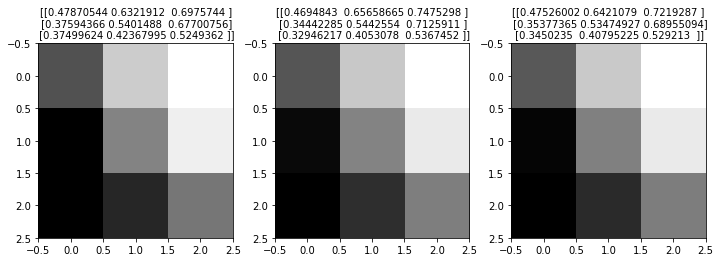


filter index : 43 - shape : (3, 3, 3)


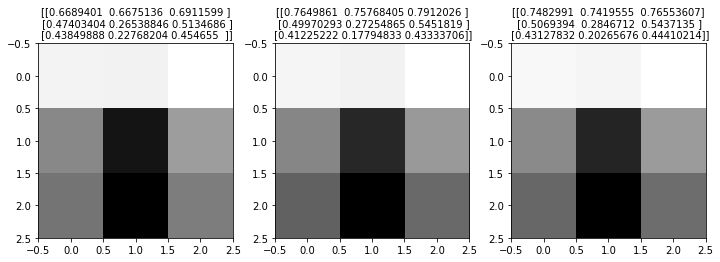


filter index : 44 - shape : (3, 3, 3)


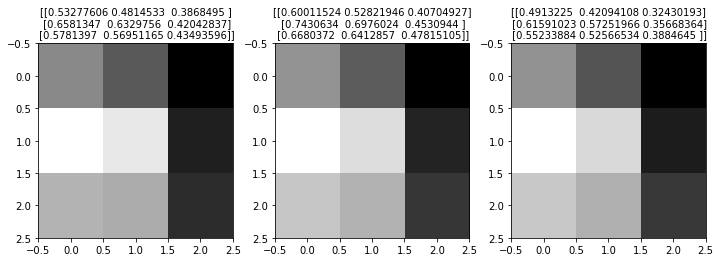


filter index : 45 - shape : (3, 3, 3)


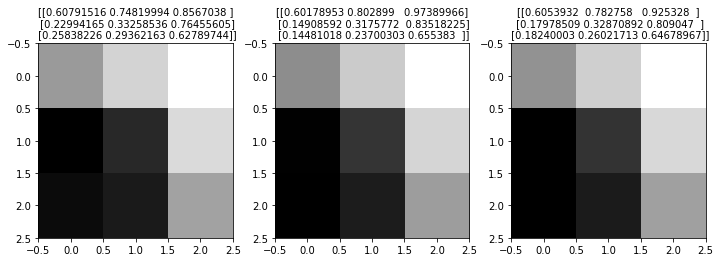


filter index : 46 - shape : (3, 3, 3)


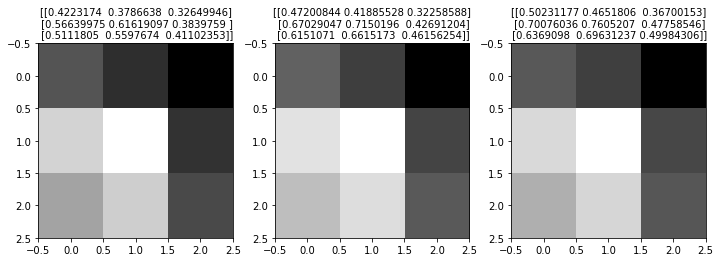


filter index : 47 - shape : (3, 3, 3)


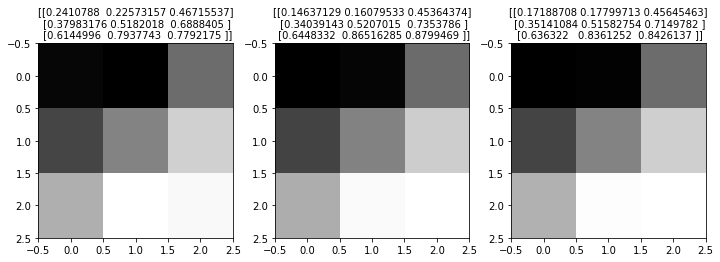


filter index : 48 - shape : (3, 3, 3)


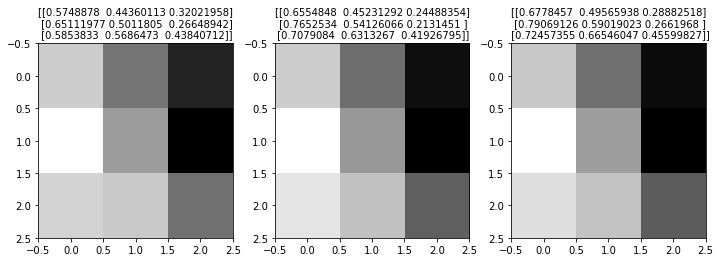


filter index : 49 - shape : (3, 3, 3)


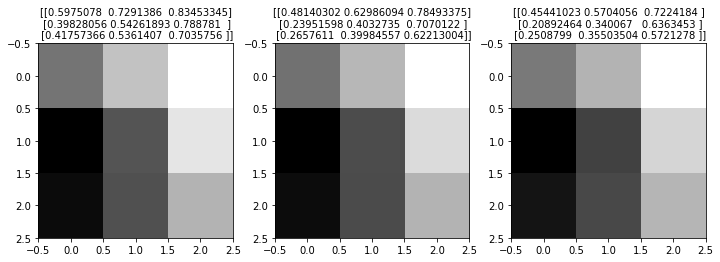


filter index : 50 - shape : (3, 3, 3)


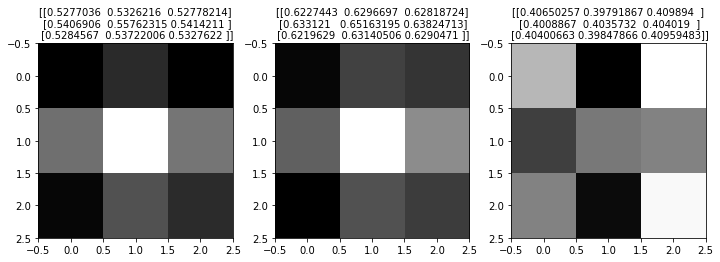


filter index : 51 - shape : (3, 3, 3)


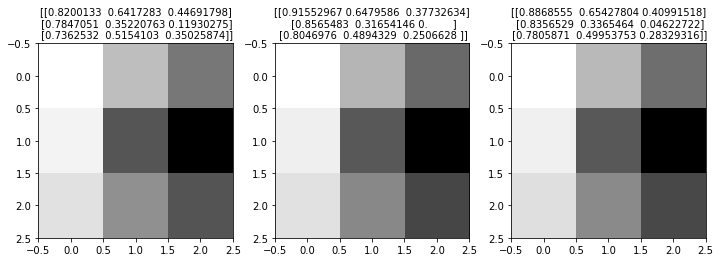


filter index : 52 - shape : (3, 3, 3)


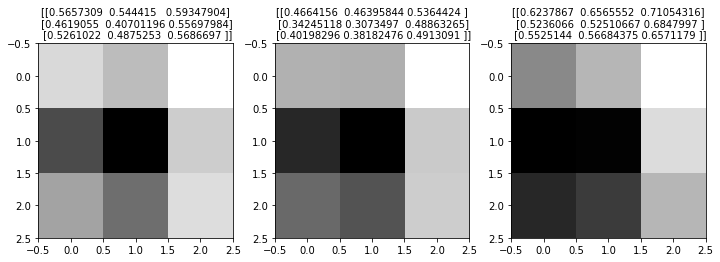


filter index : 53 - shape : (3, 3, 3)


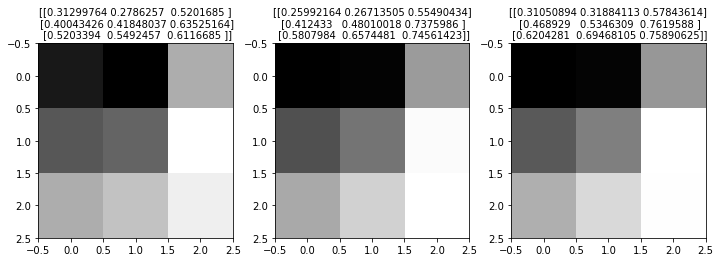


filter index : 54 - shape : (3, 3, 3)


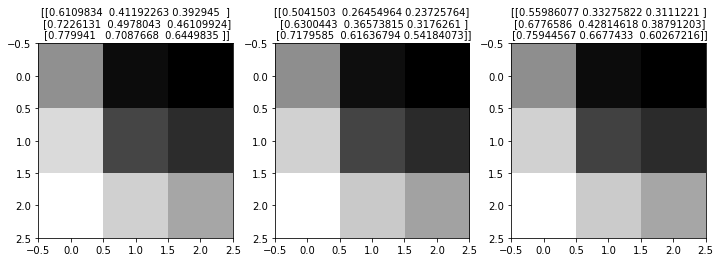


filter index : 55 - shape : (3, 3, 3)


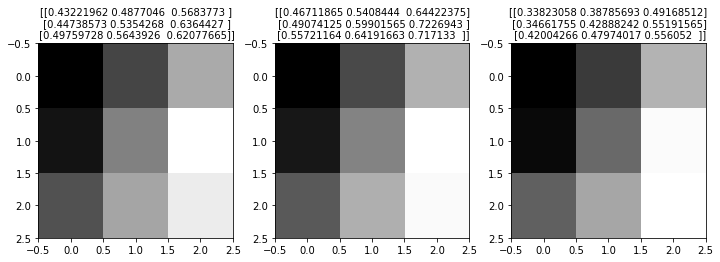


filter index : 56 - shape : (3, 3, 3)


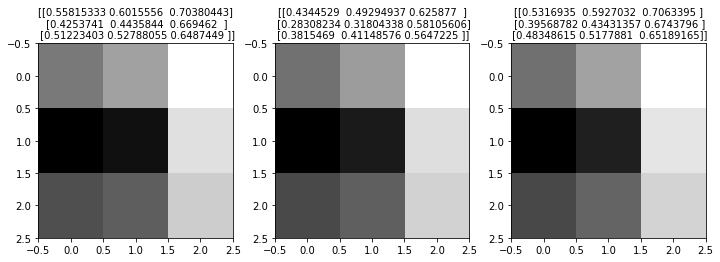


filter index : 57 - shape : (3, 3, 3)


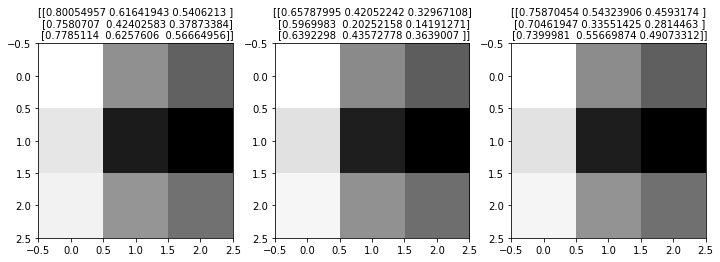


filter index : 58 - shape : (3, 3, 3)


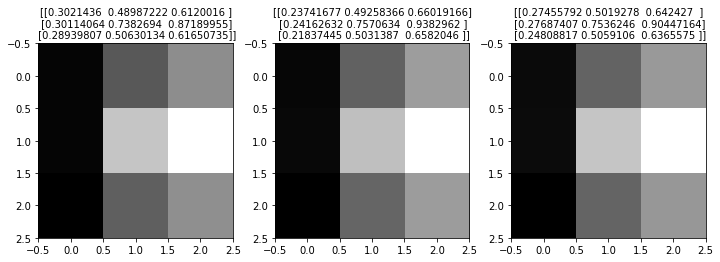


filter index : 59 - shape : (3, 3, 3)


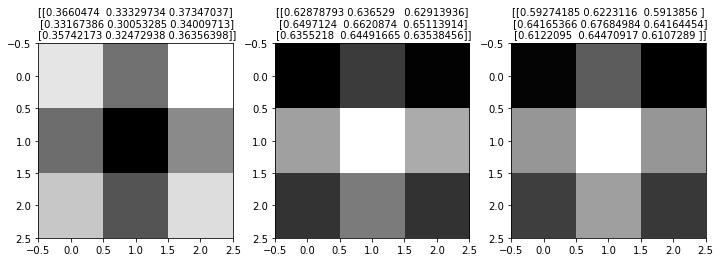


filter index : 60 - shape : (3, 3, 3)


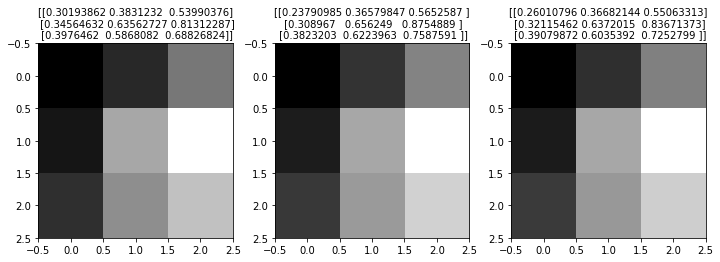


filter index : 61 - shape : (3, 3, 3)


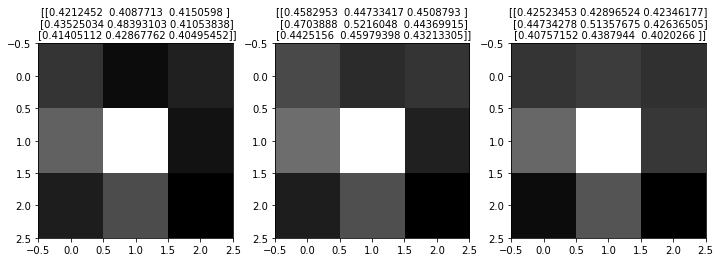


filter index : 62 - shape : (3, 3, 3)


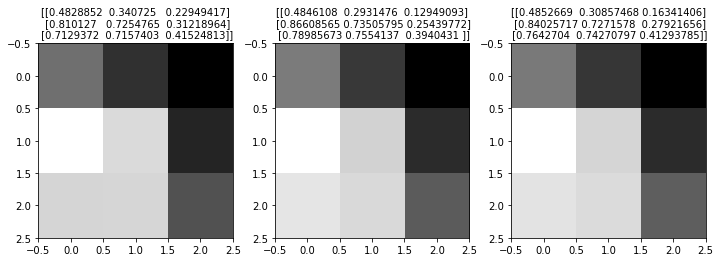


filter index : 63 - shape : (3, 3, 3)


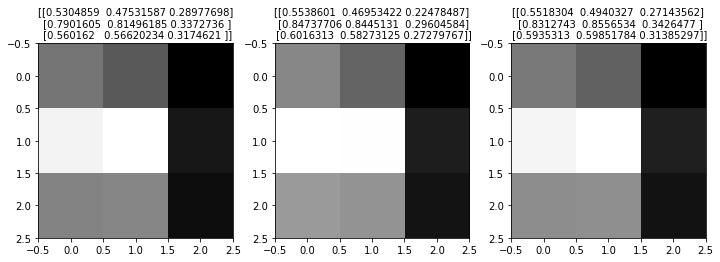

In [ ]:
# cannot easily visualize filters lower down
# from tensorflow.keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
# model = VGG16()


# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
print(filters.shape)


# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)


# plot first few filters
n_filters, ix = 64, 1

for i in range(n_filters):
  # get the filter
  f = filters[:, :, :, i]
  print("filter index :",i,"- shape :",f.shape)

  ix=1
  pyplot.figure(figsize=(10,5))
  # plot each channel separately
  for j in range(3):
    # specify subplot and turn of axis
    pyplot.subplot(1,3,ix)
    # plot filter channel in grayscale
    pyplot.title(f"{f[:, :, j]}",fontsize=10)
    pyplot.imshow(f[:, :, j], cmap='gray')
    # pyplot.axis('off')
    # pyplot.subplots_adjust(right=0.8)
    # pyplot.margins(0.8)

    ix += 1

  # show the figure
  pyplot.tight_layout()
  pyplot.show()
  print()


# part two - feature maps

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
K.clear_session()
# summarize feature map size for each conv layer
from tensorflow.keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


In [ ]:
model.layers[0].input.shape, model.layers[1].output.shape

(TensorShape([None, 224, 224, 3]), TensorShape([None, 224, 224, 64]))

## 1

In [ ]:
K.clear_session()

In [ ]:
# plot feature map of first conv layer for given image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims


# load the model
model = VGG16()


# redefine model to output right after the first hidden layer
# model = Model(inputs=model.inputs, outputs=model.layers[1].output)
# model = Model(inputs=model.input, outputs=model.layers[1].output)
model = Model(inputs=model.layers[0].input, outputs=model.layers[1].output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


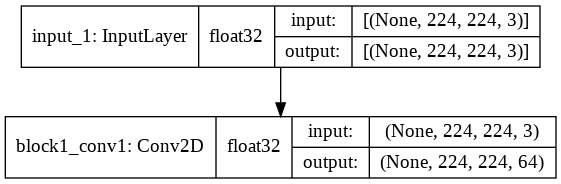

In [ ]:
tf.keras.utils.plot_model(model, to_file='model2.png', show_shapes=True, show_layer_names=True, show_dtype=True)

(224, 224, 3) float32
(1, 224, 224, 3) float32
(1, 224, 224, 3) float32
----------------------------------------------------------------------------------------------------



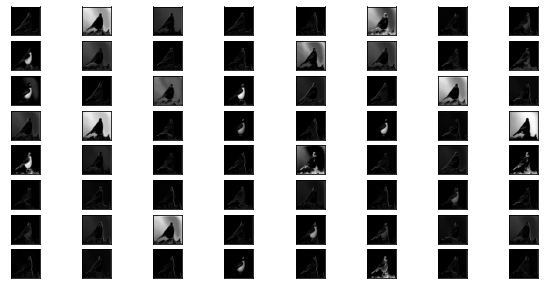

In [ ]:
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
print(img.shape, img.dtype)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
print(img.shape, img.dtype)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
print(img.shape, img.dtype)
# get feature map for first hidden layer
feature_maps = model.predict(img)

print("-"*100,end="\n\n")

# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
pyplot.figure(figsize=(10,5))
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

(224, 224, 3) float32
(1, 224, 224, 3) float32
(1, 224, 224, 3) float32
feature maps shape : (1, 224, 224, 64)
----------------------------------------------------------------------------------------------------



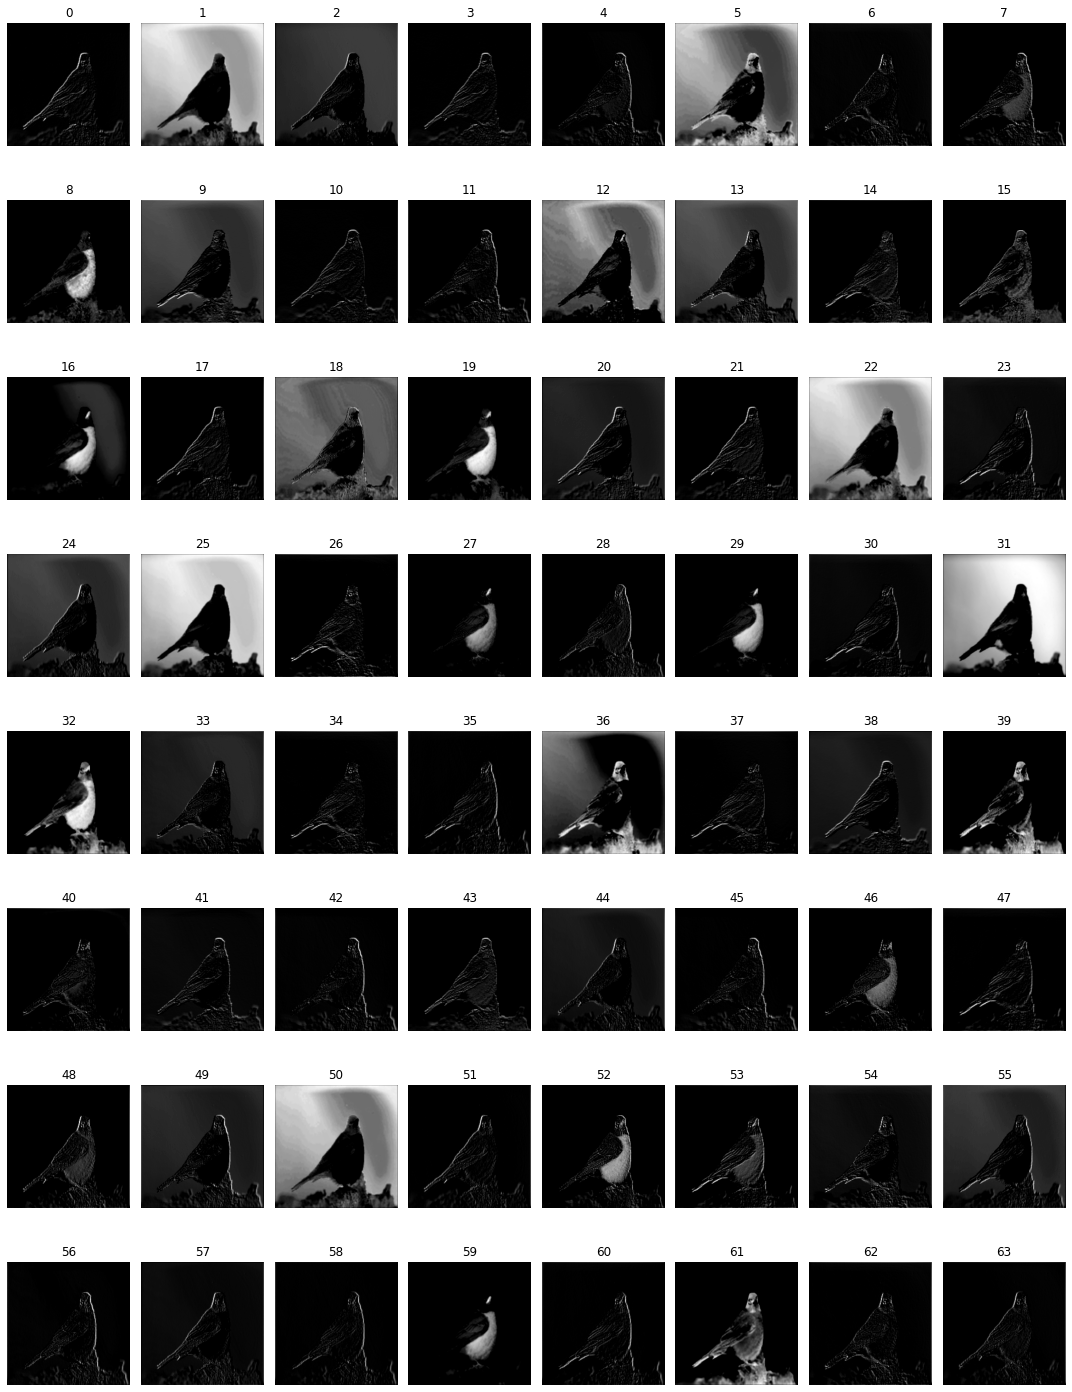

In [ ]:
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
print(img.shape, img.dtype)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
print(img.shape, img.dtype)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
print(img.shape, img.dtype)
# get feature map for first hidden layer
feature_maps = model.predict(img)
print("feature maps shape :",feature_maps.shape)
print("-"*100,end="\n\n")





pyplot.figure(figsize=(15,20))
for i in range(feature_maps.shape[-1]):
  pyplot.subplot(8,8,i+1)
  pyplot.title(f"{i}")
  pyplot.imshow(feature_maps[0, :, :, i], cmap='gray')
  pyplot.axis('off')

# show the figure
pyplot.tight_layout()
pyplot.show()


(224, 224, 3) float32
(1, 224, 224, 3) float32
(1, 224, 224, 3) float32
feature maps shape : (1, 224, 224, 64)
----------------------------------------------------------------------------------------------------



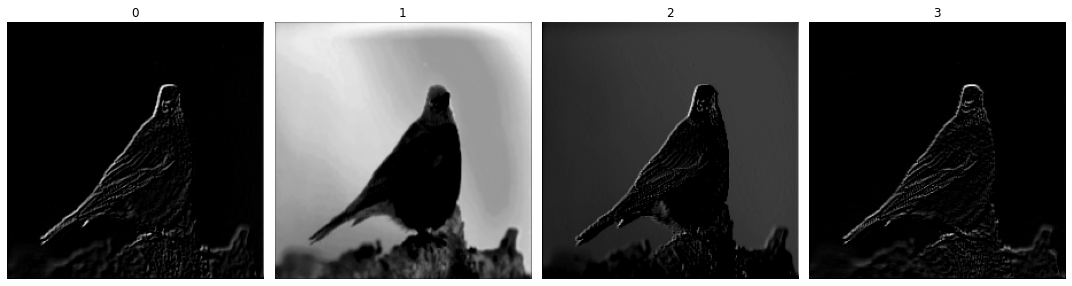

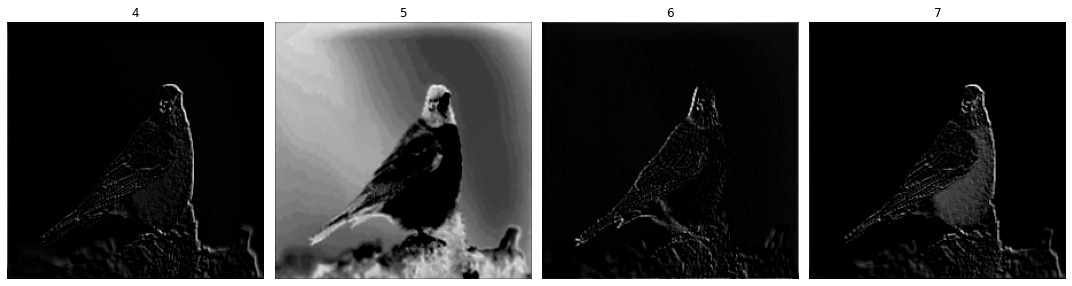

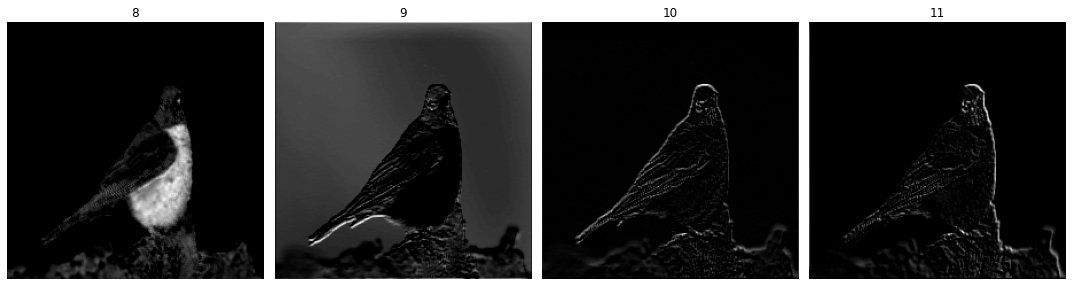

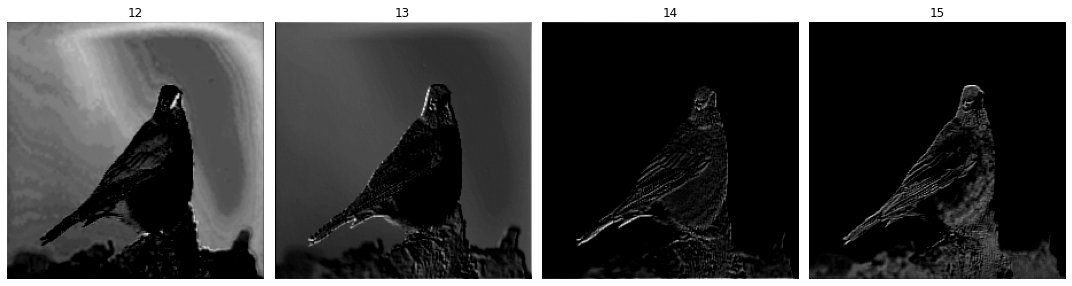

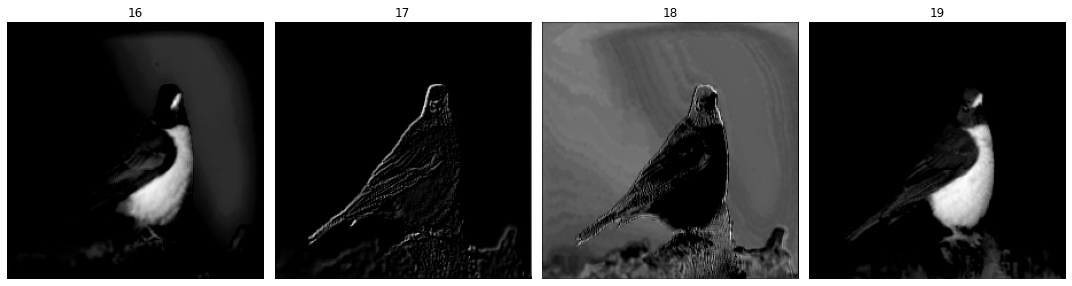

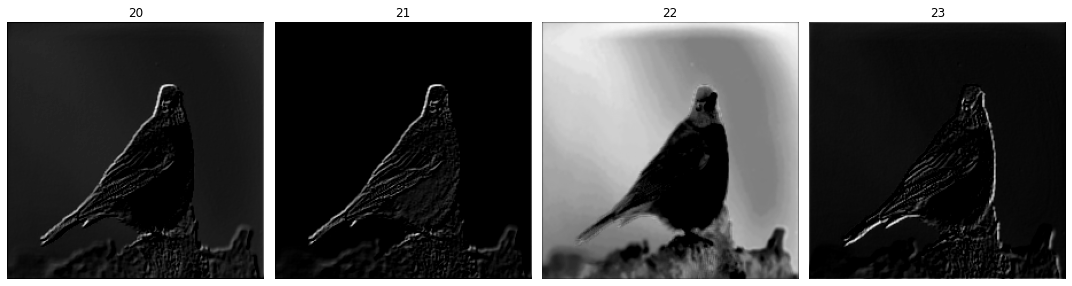

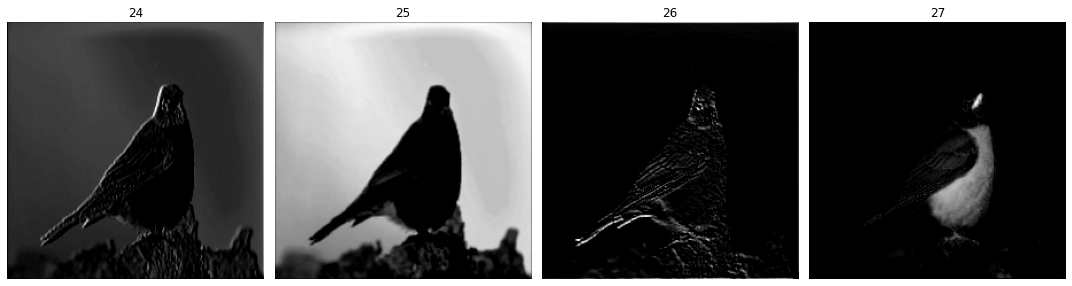

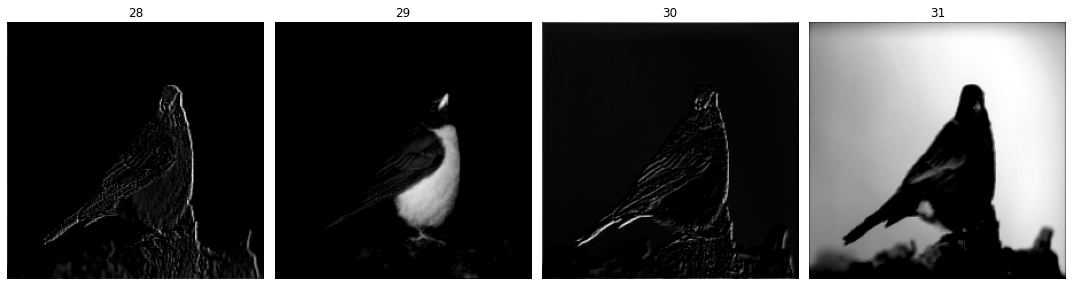

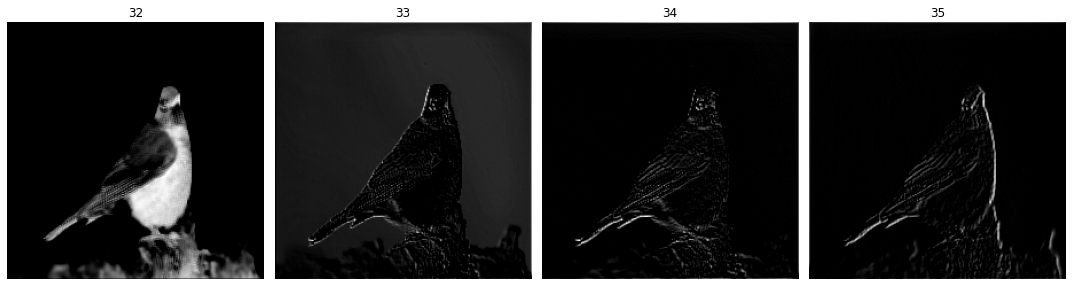

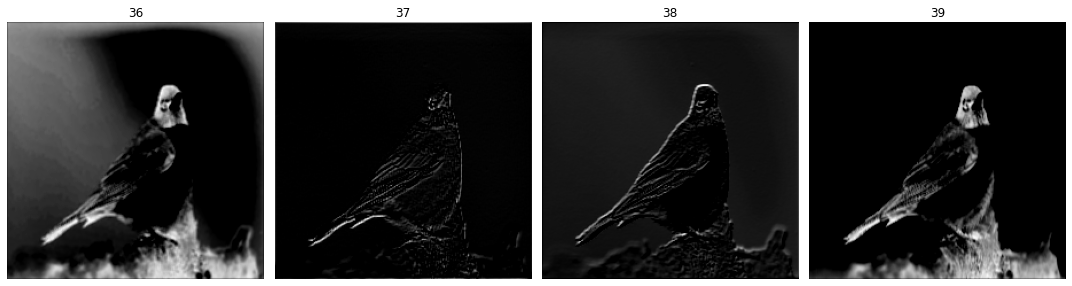

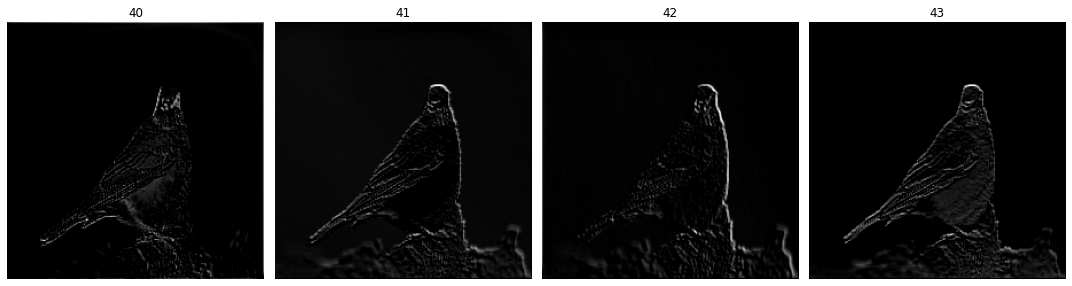

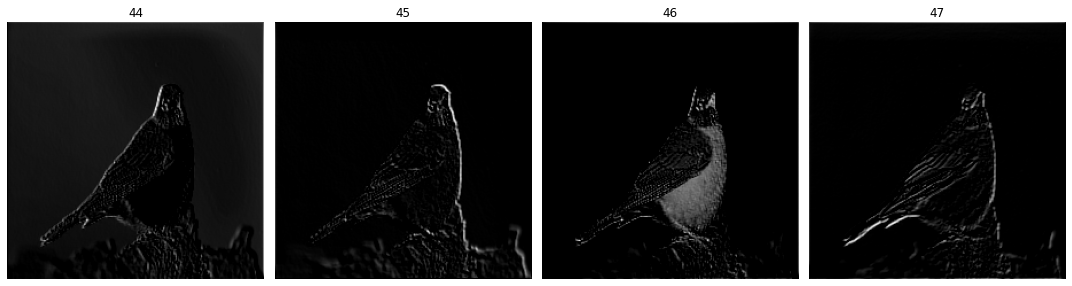

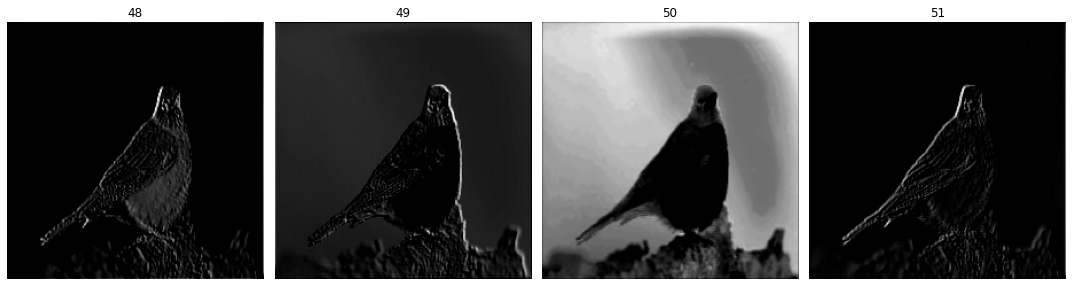

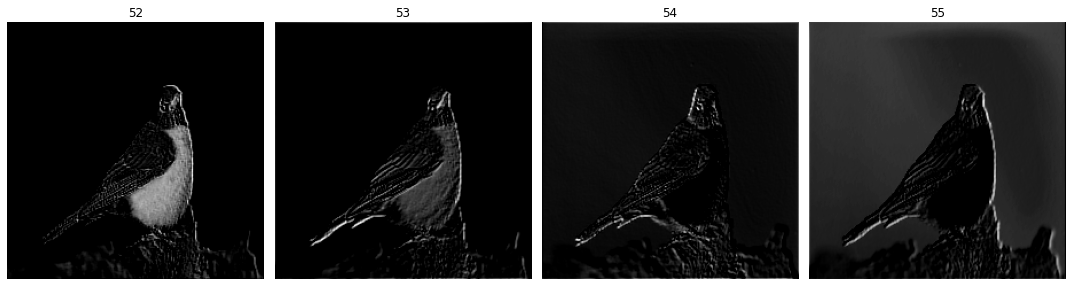

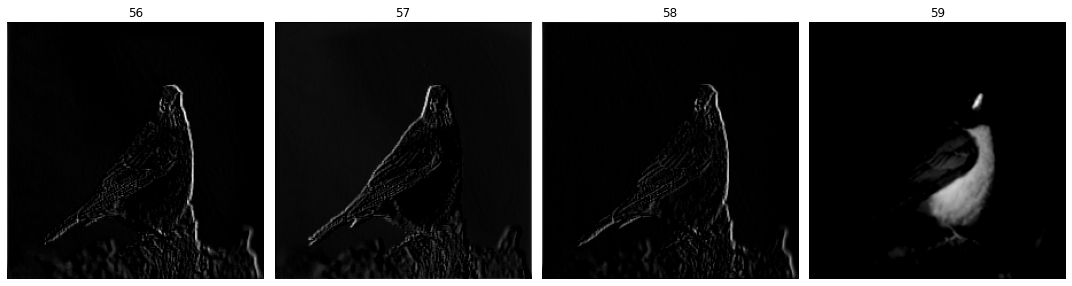

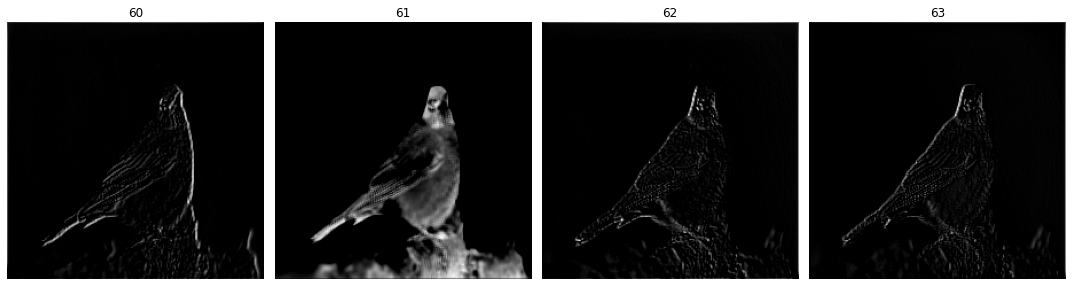

In [ ]:
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
print(img.shape, img.dtype)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
print(img.shape, img.dtype)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
print(img.shape, img.dtype)
# get feature map for first hidden layer
feature_maps = model.predict(img)
print("feature maps shape :",feature_maps.shape)
print("-"*100,end="\n\n")

# feature_maps.shape[-1]
row = 16
col = 4
index_feature_map = 0
for i in range(row):
  pyplot.figure(figsize=(15,7))
  for j in range(col):
    pyplot.subplot(1,col,j+1)
    pyplot.title(f"{index_feature_map}")
    pyplot.imshow(feature_maps[0, :, :, index_feature_map], cmap='gray')
    pyplot.axis('off')
    index_feature_map += 1
  pyplot.tight_layout()
  pyplot.show()
  print()

## 2

In [ ]:
K.clear_session()

In [ ]:
# visualize feature maps output from each block in the vgg model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)


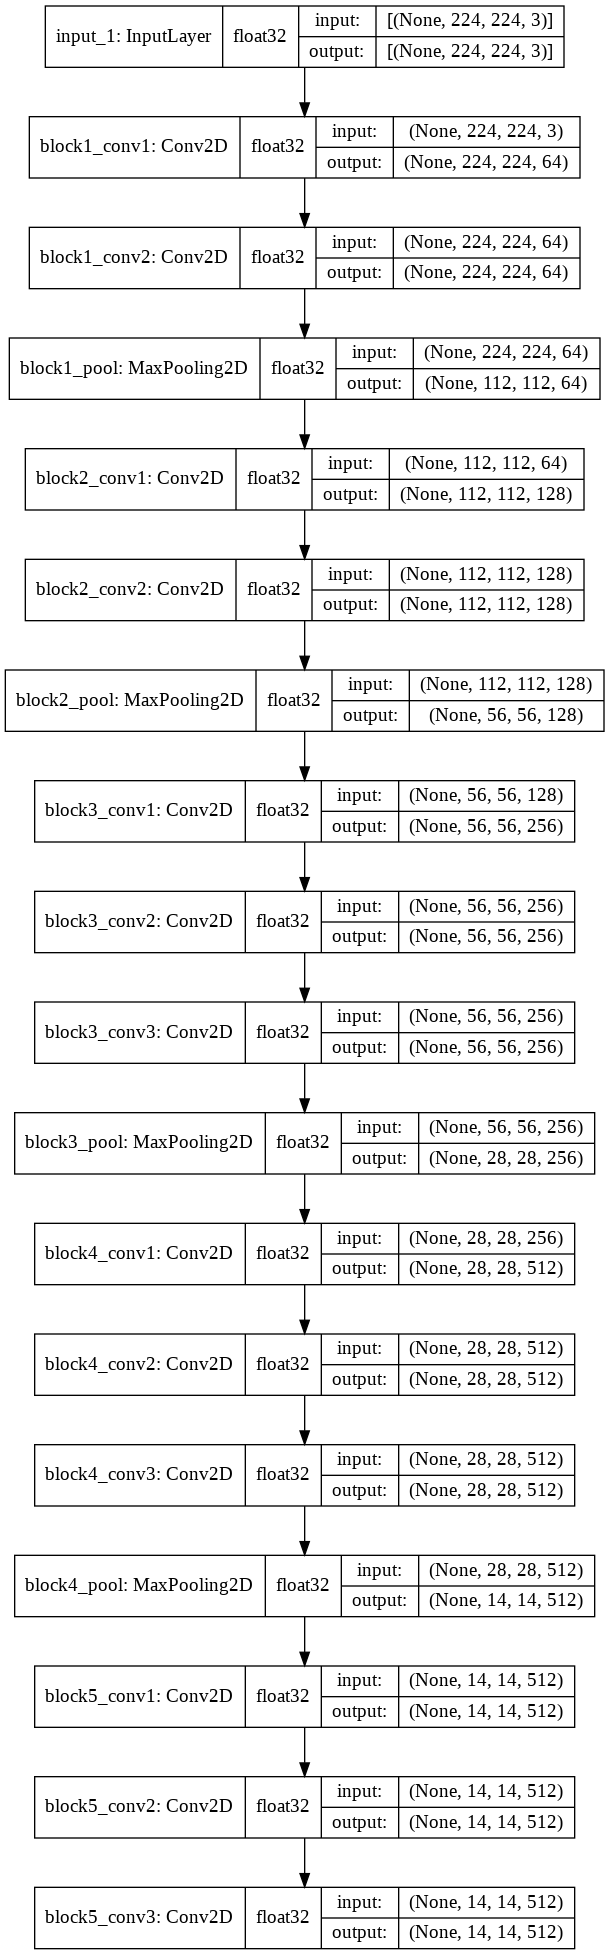

In [ ]:
tf.keras.utils.plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, show_dtype=True)

In [ ]:
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
print(img.shape, img.dtype)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
print(img.shape, img.dtype)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
print(img.shape, img.dtype)
# get feature map for first hidden layer
feature_maps = model.predict(img)
print("feature maps length :",len(feature_maps))
# print("feature maps 0 shape :",feature_maps[0].shape)
[print(f"feature maps {index} shape :", i.shape) for index,i in enumerate(feature_maps)]

print("-"*100,end="\n\n")

(224, 224, 3) float32
(1, 224, 224, 3) float32
(1, 224, 224, 3) float32
feature maps length : 5
feature maps 0 shape : (1, 224, 224, 64)
feature maps 1 shape : (1, 112, 112, 128)
feature maps 2 shape : (1, 56, 56, 256)
feature maps 3 shape : (1, 28, 28, 512)
feature maps 4 shape : (1, 14, 14, 512)
----------------------------------------------------------------------------------------------------



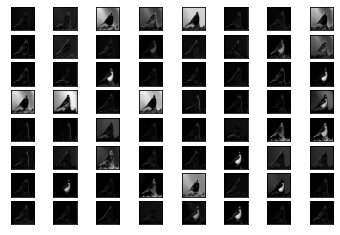

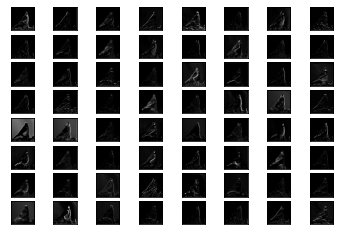

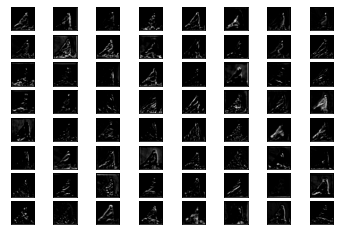

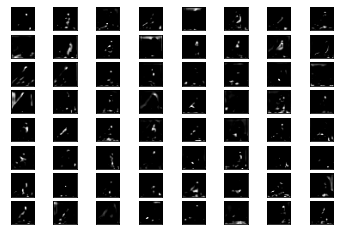

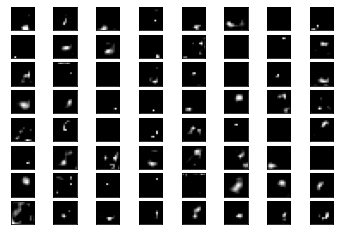

In [ ]:
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	pyplot.show()

0


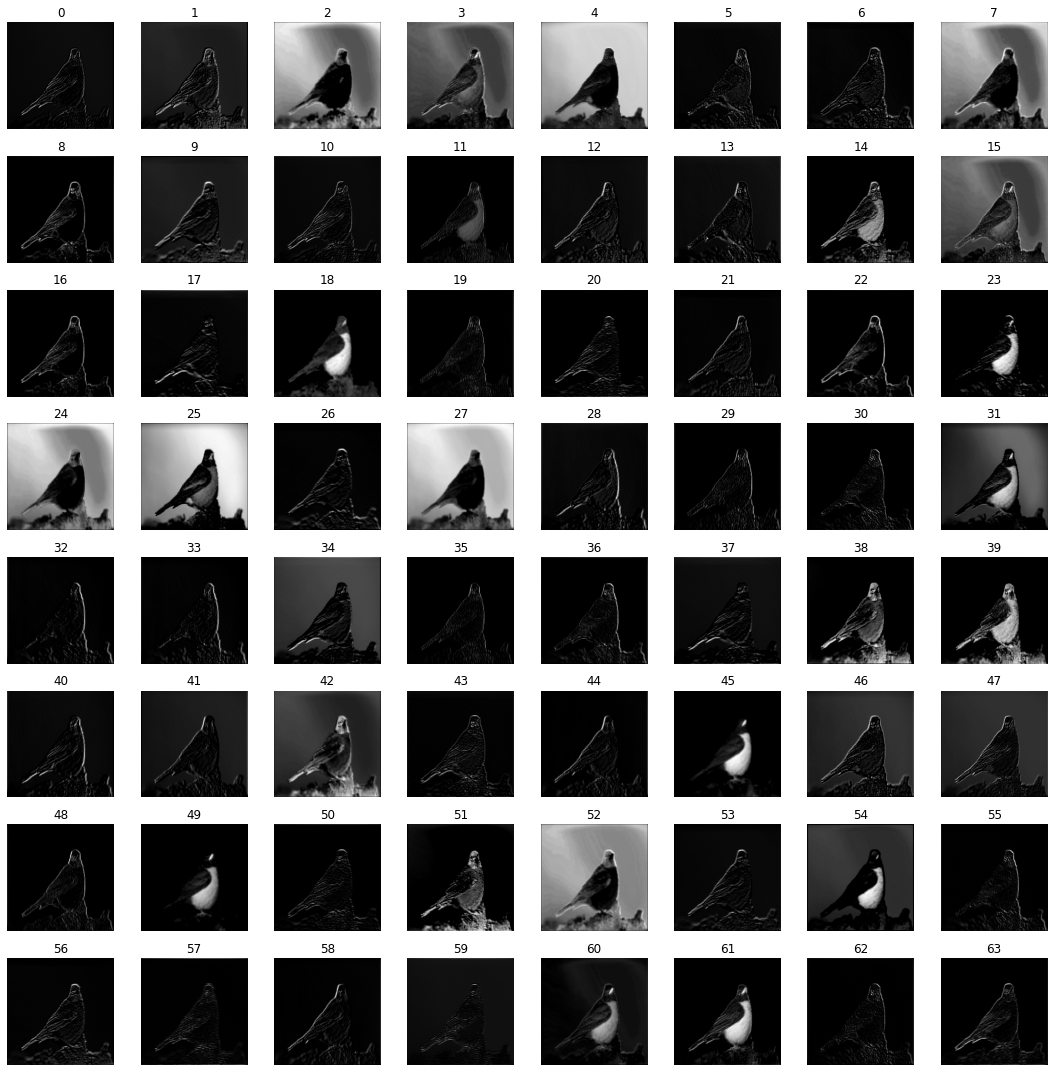




1


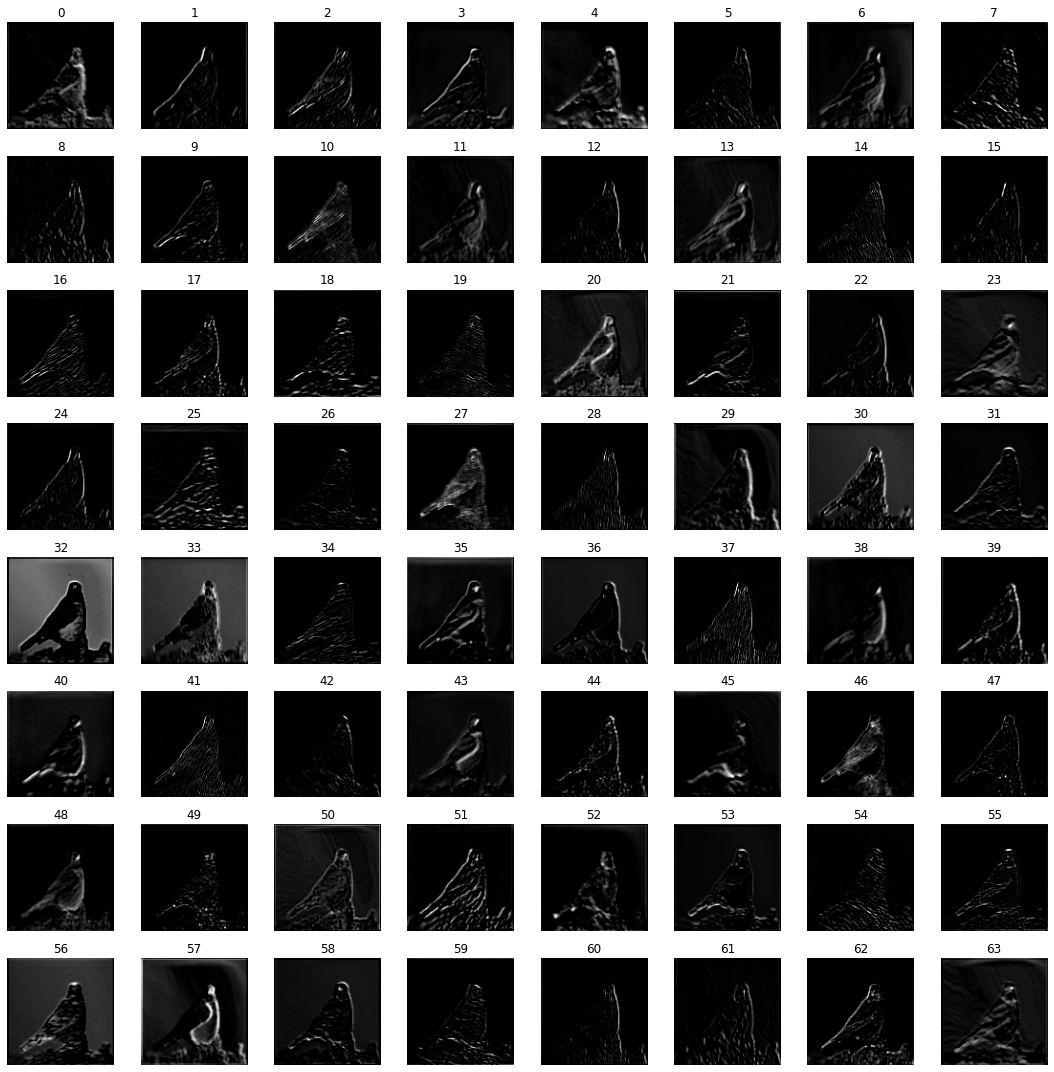




2


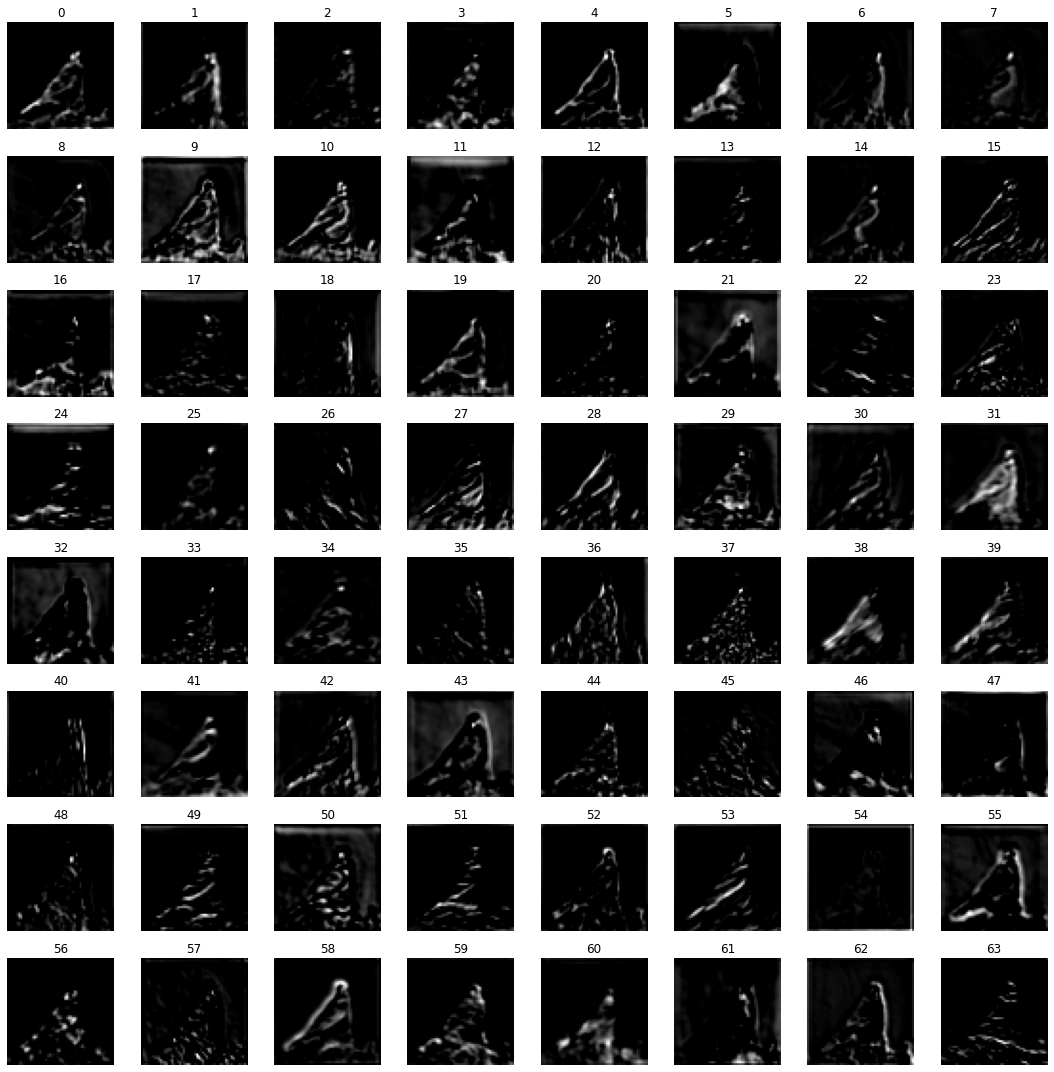




3


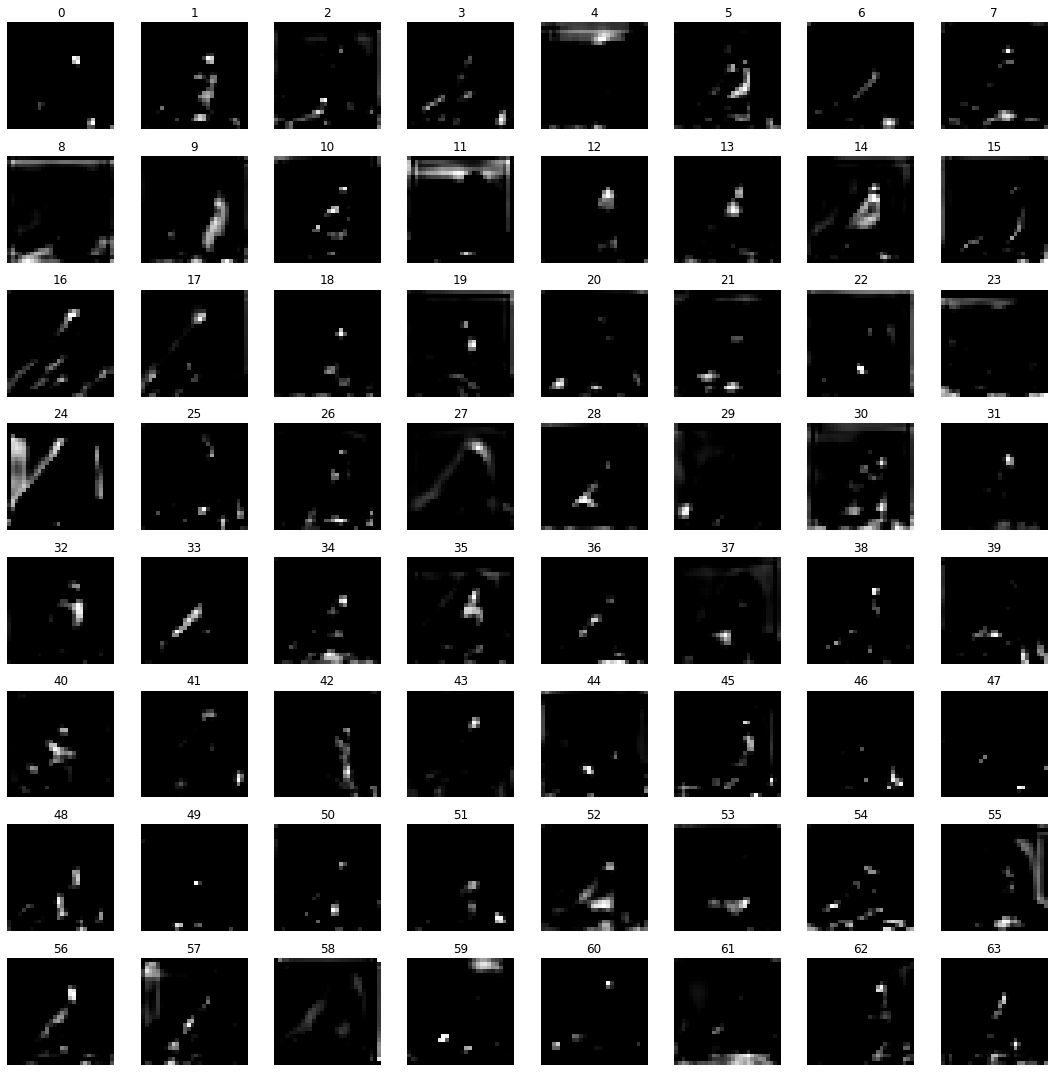




4


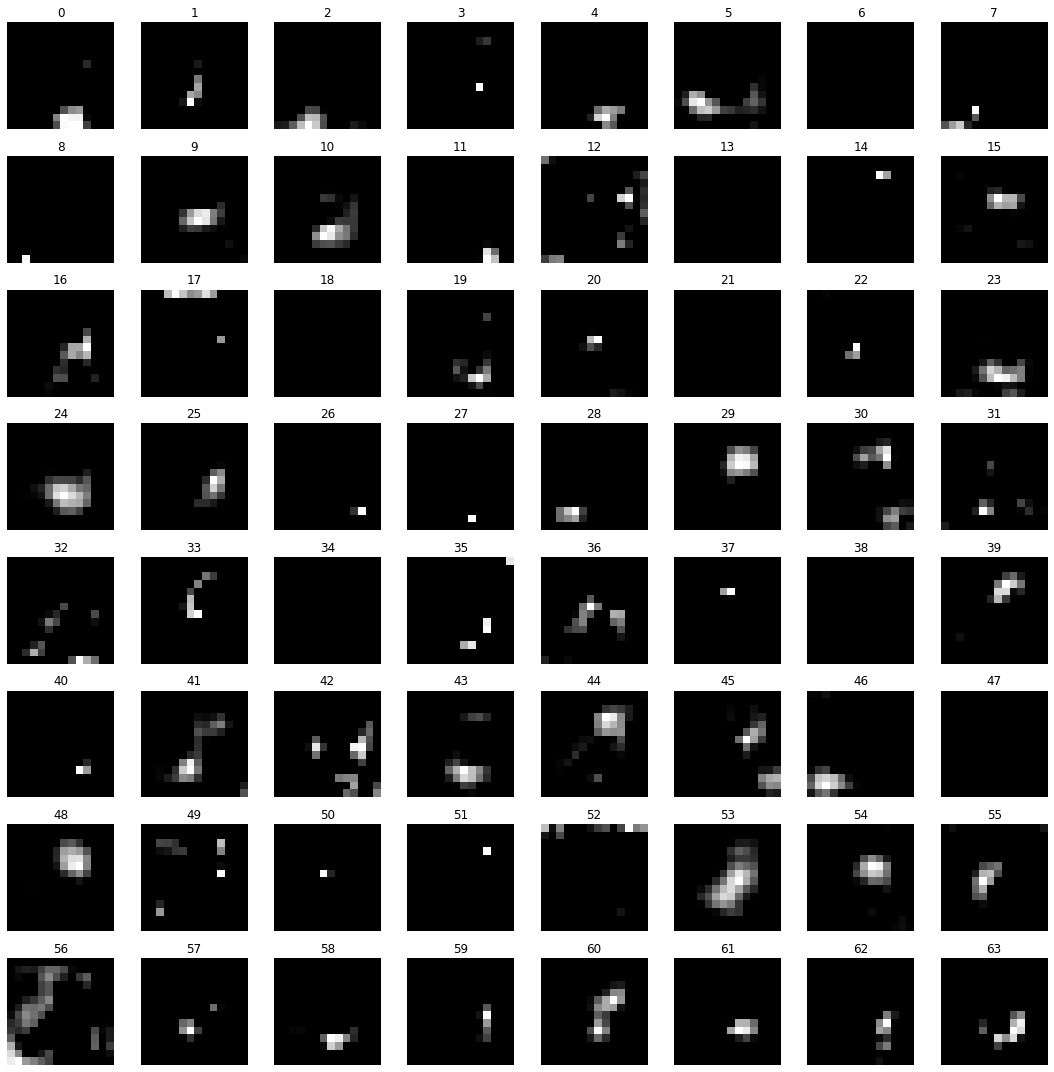

In [ ]:
for index,fmap in enumerate(feature_maps):
  
  print(index)
  pyplot.figure(figsize=(15,15))
  for i in range(fmap.shape[-1]):
    if i == 64:
      break
    pyplot.subplot(8,8,i+1)
    pyplot.title(f"{i}")
    pyplot.imshow(fmap[0, :, :, i], cmap='gray')
    pyplot.axis('off')

  pyplot.tight_layout()
  pyplot.show()
  print(end="\n\n\n")

# feature map in end of block

0


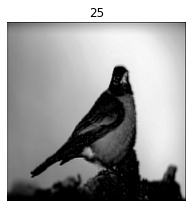

1


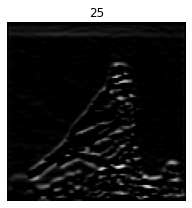

2


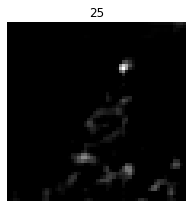

3


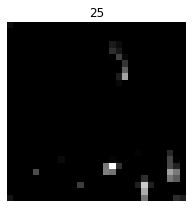

4


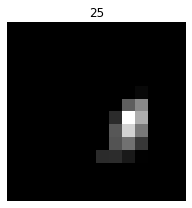

In [ ]:
for index,fmap in enumerate(feature_maps):
  
  print(index)
  pyplot.figure(figsize=(3,3))
  for i in range(fmap.shape[-1]):
    if i == 25:
      pyplot.title(f"{i}")
      pyplot.imshow(fmap[0, :, :, i], cmap='gray')
      pyplot.axis('off')

  pyplot.tight_layout()
  pyplot.show()